### Assignment 1 - Data Exploration

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explore a dataset about used cars.

1. Import the necessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2. Read in the dataset, 'ToyotaCorolla.csv'.
The data set includes sale prices and vehicle characteristics of 1436 used Toyota Corollas. The variables are defined as follows:<br>
a.	Price: sale price in Euros<br>
b.	Age: age in months<br>
c.	KM: accumulated kilometers on odometer<br>
d.	Fuel_type: Fuel type (petrol, diesel, CNG)<br>
e.	HP: horsepower<br>
f.	MetColor: Metallic color (yes=1, no=0)<br>
g.	Automatic: Automatic gear shift (yes=1, no=0)<br>
h.	Doors: Number of doors<br>


In [2]:
# Reading in dataset
corolla_df = pd.read_csv('ToyotaCorolla.csv')

# Ensure dataset is read in correctly based on above info
corolla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   Doors      1436 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 89.9+ KB


3. Explore the variable 'Price' using statistics (central tendency and variability) and a graph. Describe your findings.


As seen in the summary statistics below, the average car price in the dataset is about $10,730, with prices ranging from $4,350 to $32,500, and a standard deviation of $3,627, indicating moderate variability. The histogram shows a right-skewed distribution, indicating that most car prices cluster around the lower price range.

In [18]:
corolla_df['Price'].describe()

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

<Axes: title={'center': 'Distribution of Car Prices'}, ylabel='Frequency'>

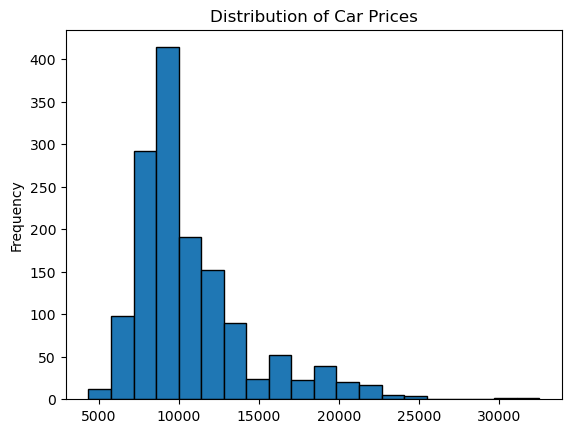

In [17]:
corolla_df['Price'].plot(kind='hist', bins=20, edgecolor='black', title='Distribution of Car Prices')

4. Explore the variable 'Fuel_type' using statistics and a graph. Describe your findings.

A vast majority of the cars in the dataset are Petrol cars, with Petrol cars making up about 88% of the fuel types. This shows that alternative fuel types are much less common in Corollas, and may indicate alternative fuel type cars being manufactured on a case-by-case basis.

In [4]:
# Exploring using statistics
corolla_df['Fuel_Type'].describe()

count       1436
unique         3
top       Petrol
freq        1264
Name: Fuel_Type, dtype: object

Text(0.5, 1.0, 'Fuel Type Distribution')

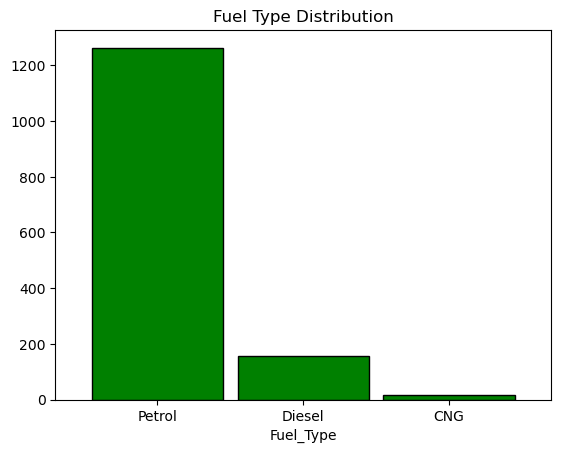

In [20]:
# Bar chart for fuel type
fuel_type_frequency = corolla_df['Fuel_Type'].value_counts()
fuel_type_frequency.plot(kind='bar', color= 'g', width = .9, edgecolor = 'black')

# Adjusting x labels with matplotlib
plt.xticks(rotation = 0)
plt.title('Fuel Type Distribution')

5. Explore the relationship between variable 'KM' and 'Price' using statistics and a graph. Describe your findings.

As seen in the correlation matrix below, the correlation between KM and Price is -0.57, indicating a moderate negative relationship. The scatter plot visually confirms this trend, showing that as the number of kilometers driven increases, the car price generally decreases.

In [26]:
correlation_matrix = corolla_df[['KM', 'Price']].corr()
correlation_matrix

,KM,Price
KM,1.00000,-0.56996
Price,-0.56996,1.00000


Text(0.5, 1.0, 'Relationship between KM and Price')

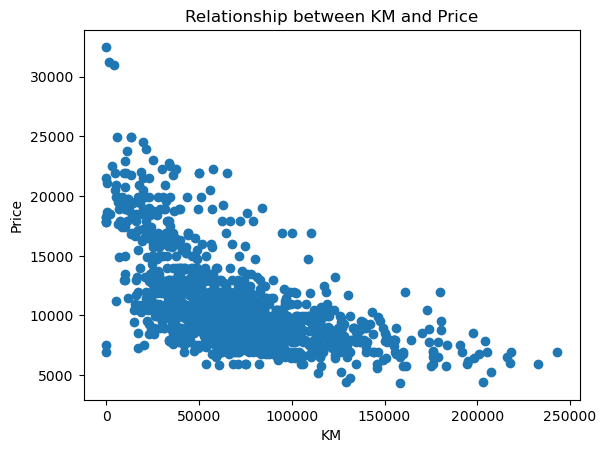

In [22]:
plt.scatter(corolla_df['KM'], corolla_df['Price'])

plt.xlabel('KM')
plt.ylabel('Price')
plt.title('Relationship between KM and Price')

6. Explore the relationship between variable 'Automatic' and 'Price' using a graph. Describe your findings.

The box plot shows that automatic cars tend to have higher prices on average compared to manual cars. However, manual cars exhibit more price variation and many more outliers that fall in the more expensive price range.

Text(0.5, 1.0, 'Price Distribution by Transmission Type')

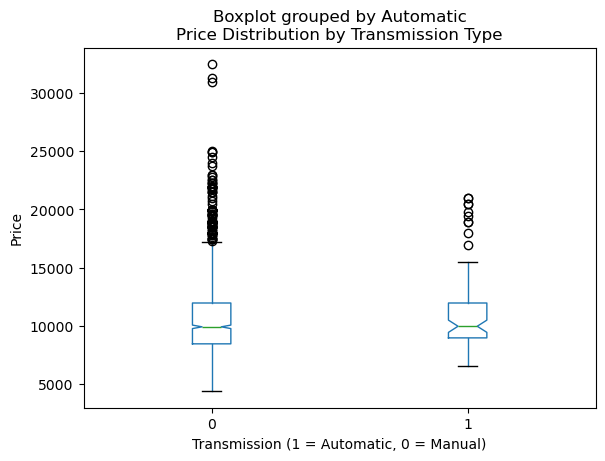

In [29]:
corolla_df.boxplot(column='Price', by='Automatic', grid=False, notch=True)

plt.xlabel('Transmission (1 = Automatic, 0 = Manual)')
plt.ylabel('Price')
plt.title('Price Distribution by Transmission Type')


7. Check the number of unique values of 'Doors'. How many of them? Think about the measurement level of “Doors”. What would you do with this variable?

While is does depend on the context, 'Doors' is most likely a ordinal variable, with no number of doors being better or worse than the others. We can run descriptive analysis on this variable by analyzing the frequency distribution.

In [30]:
corolla_df['Doors'].unique()

array([3, 5, 4, 2])